### **Here 3 different grids are compared:**
1. Uniformal grid.
2. Grid of the Chebyshev's polynomial roots.
3. Grid of the points obtained via **maxvol.**

Interpolation of $f(x)$ using basis of Chebyshev polynomials $\hat{f}(x) = \sum\limits_{i = 0}^{n}c_iT_i(x)$ and monomials $\hat{f}(x) = \sum\limits_{i = 0}^{n}c_ix^i$ are performed on these grids.

In [1]:
import numpy as np
from maxvolpy.maxvol import maxvol
from numpy.polynomial import Chebyshev as T
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline


# this function approximates set of points (arr, rhs) with linear combination of either Chebyshev polynomials or monomials
'''
Input:
x – all the points
f – right hand side values f(x)
basis = ('cheb', 'poly') – basis functions
degree – highest degree of appr polynomial
grid type = ('unif', 'cheb', 'maxvol') 
dom – interval of x
'''
def approx(arr, rhs, basis, degree, grid, dom):
    num_of_points = degree + 1
    
    A = np.zeros((len(arr), num_of_points), dtype = np.float32) # Matrix of function values
    
    # basis
    if (basis == 'cheb'):
        for i in range(num_of_points):
            A[:, i] = T.basis(i)(arr[:])
    elif (basis == 'poly'):
        for i in range(num_of_points):
            A[:, i] = arr[:]**i
            
    # grid        
    if (grid == 'unif'):
        row_indx = np.arange(num_of_points - 1) * np.int(np.floor(len(arr) / (num_of_points - 1)))
        row_indx = np.append(row_indx, (len(arr) - 1)) 
    elif (grid == 'cheb'):
        row_indx = np.zeros(num_of_points).astype(int)
        x_cheb = (T.basis(num_of_points, domain = dom)).roots()
        for i in range(len(x_cheb)):
            row_indx[i] = (np.abs(arr - x_cheb[i])).argmin() 
    elif (grid == 'maxvol'):
        row_indx, _ = maxvol(A, tol = 1, max_iters = 1000000) 
        
    # solution 
    c = np.linalg.solve(A[row_indx], f[row_indx])
    if (basis == 'cheb'):
        f_appr = np.polynomial.chebyshev.chebval(arr, c)
    elif (basis == 'poly'):
        f_appr = np.polynomial.polynomial.polyval(arr, c)
    
    # draw
    plt.plot(arr, f, 'b', arr, f_appr, 'r--', arr[row_indx], f[row_indx], 'go')
    plt.grid()
    plt.title(grid)
    plt.show()
    
    # error
    print('Error_' + grid + ' = ', la.norm(f - f_appr, 2) / la.norm(f, 2))

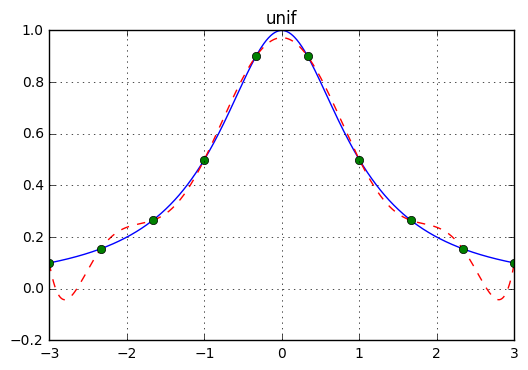

('Error_unif = ', 0.10485715311999745)


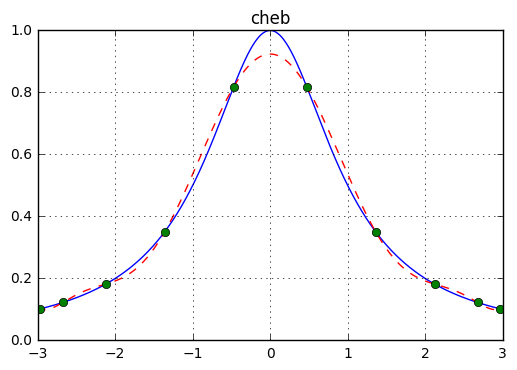

('Error_cheb = ', 0.053868373305295175)


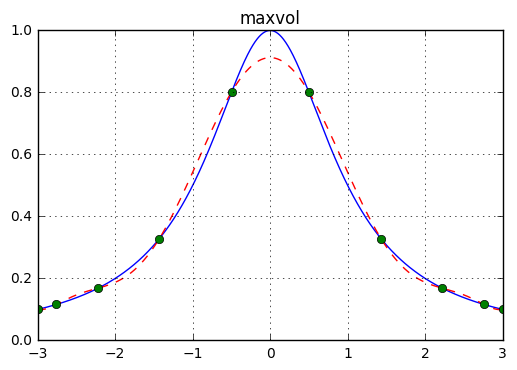

('Error_maxvol = ', 0.061312857893777342)


In [2]:
# let's test our approx function here
n = 1000     # number of sampling points   
deg = 9      # degree of polynomial          
interval = [-3, 3]  # interval of x
x = np.linspace(interval[0], interval[1], n) 
f = 1/(x**2 + 1)  # function we want to approximate

approx(x, f, basis = 'cheb', degree = deg, grid = 'unif',   dom = interval)
approx(x, f, basis = 'cheb', degree = deg, grid = 'cheb',   dom = interval)
approx(x, f, basis = 'cheb', degree = deg, grid = 'maxvol', dom = interval)